In [10]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [11]:
# read dataframe
compiled = pd.read_csv("./articles.csv", parse_dates = ['datetime'])

In [16]:
compiled['date_only'] = pd.to_datetime(compiled['datetime'].dt.date)

In [17]:
compiled['date_only'].min()

Timestamp('2020-03-11 00:00:00')

In [18]:
compiled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   datetime   91 non-null     datetime64[ns, UTC]
 1   url        91 non-null     object             
 2   content    91 non-null     object             
 3   sentiment  91 non-null     float64            
 4   polarity   91 non-null     float64            
 5   date_only  91 non-null     datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), object(2)
memory usage: 4.4+ KB


In [23]:
compiled['days_elapse'] = (compiled['date_only'] - pd.to_datetime('2020-03-11')).astype('timedelta64[D]')

In [24]:
compiled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   datetime     91 non-null     datetime64[ns, UTC]
 1   url          91 non-null     object             
 2   content      91 non-null     object             
 3   sentiment    91 non-null     float64            
 4   polarity     91 non-null     float64            
 5   date_only    91 non-null     datetime64[ns]     
 6   days_elapse  91 non-null     float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(3), object(2)
memory usage: 5.1+ KB


In [25]:
compiled.describe()

,sentiment,polarity,days_elapse
count,91.000000,91.000000,91.000000
mean,0.116748,0.439803,57.934066
std,0.055761,0.056963,32.166512
min,-0.017101,0.266179,0.000000
25%,0.084434,0.412693,36.500000
50%,0.124649,0.439431,59.000000
75%,0.151835,0.474932,83.000000
max,0.286599,0.625551,117.000000


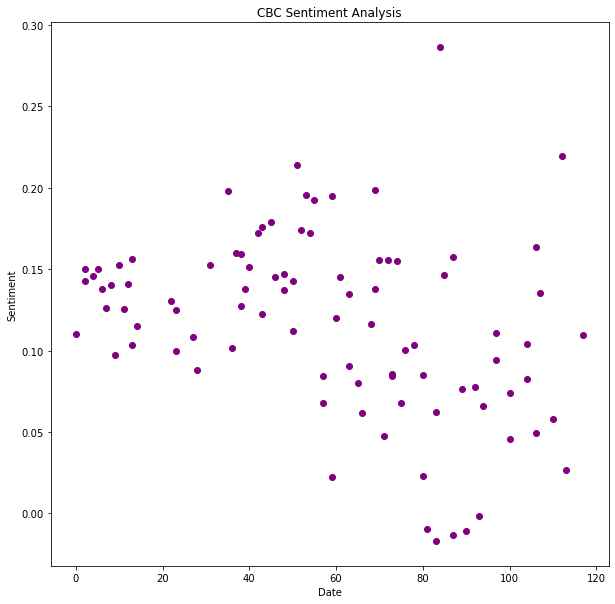

In [26]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(compiled['days_elapse'],
        compiled['sentiment'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Sentiment",
       title="CBC Sentiment Analysis")

plt.show()

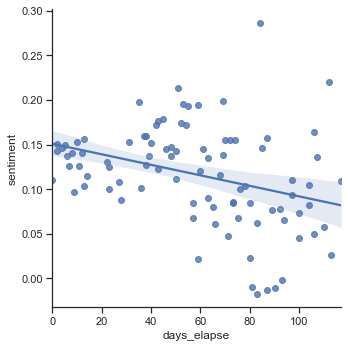

In [30]:
# scatter plot of sentiment
sns.set(style="ticks")
sns.lmplot(x="days_elapse", y="sentiment", data = compiled);

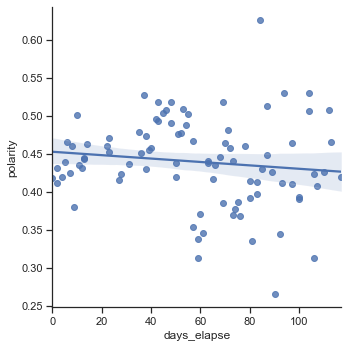

In [28]:
# scatter plot of sentiment
sns.set(style="ticks")
sns.lmplot(x="days_elapse", y="polarity", data = compiled);

In [32]:
model_sentiment = smf.ols(data = compiled, formula = "sentiment ~ days_elapse").fit()
model_sentiment.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     11.66
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           0.000966
Time:                        12:42:02   Log-Likelihood:                 139.67
No. Observations:                  91   AIC:                            -275.3
Df Residuals:                      89   BIC:                            -270.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1509      0.011     13.199      0.000       0.128       0.174
days_elapse    -0.0006      0.000     -3.414      0.001      -0.001      -0.000
==============================================================================
Omnibus:                        6.102   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                7.078
Skew:                           0.328   Prob(JB):                       0.0290
Kurtosis:                       4.198   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model_polarity = smf.ols(data = compiled, formula = "polarity ~ days_elapse").fit()
model_polarity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               polarity   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.450
Date:                Sun, 12 Jul 2020   Prob (F-statistic):              0.232
Time:                        12:42:00   Log-Likelihood:                 132.86
No. Observations:                  91   AIC:                            -261.7
Df Residuals:                      89   BIC:                            -256.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4528      0.012     36.744      0.000       0.428       0.477
days_elapse    -0.0002      0.000     -1.204      0.232      -0.001       0.000
==============================================================================
Omnibus:                        3.557   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                3.949
Skew:                          -0.004   Prob(JB):                        0.139
Kurtosis:                       4.021   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""